# Activity: Validate and clean your data

## Introduction

In this activity, you will use input validation and label encoding to prepare a dataset for analysis. These are fundamental techniques used in all types of data analysis, from simple linear regression to complex neural networks. 

In this activity, you are a data professional an investment firm that is attempting to invest in private companies with a valuation of at least $1 billion. These are often known as "unicorns." Your client wants to develop a better understanding of unicorns, with the hope they can be early investors in future highly successful companies. They are particularly interested in the investment strategies of the three top unicorn investors: Sequoia Capital, Tiger Global Management, and Accel. 

## Step 1: Imports

Import relevant Python libraries and packages: `numpy`, `pandas`, `seaborn`, and `pyplot` from `matplotlib`.

In [2]:
# Import libraries and packages.

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Load the dataset

The data contains details about unicorn companies, such as when they were founded, when they achieved unicorn status, and their current valuation. The dataset `Modified_Unicorn_Companies.csv` is loaded as `companies`, now display the first five rows. The variables in the dataset have been adjusted to suit the objectives of this lab, so they may be different from similar data used in prior labs. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

companies = pd.read_csv('Modified_Unicorn_Companies.csv')

# Display the first five rows.

companies.head(5)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


## Step 2: Data cleaning


Begin by displaying the data types of the columns in `companies`.

In [4]:
# Display the data types of the columns.

companies.dtypes

Company             object
Valuation            int64
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Review what you have learned about exploratory data analysis in Python.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

There is a `pandas` DataFrame property that displays the data types of the columns in the specified DataFrame.
 

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

  The `pandas` DataFrame `dtypes` property will be helpful.

</details>

### Correct the data types

If any of the data types in `companies` are incorrect, fix them and save them back to `companies`.

In [5]:
# Apply necessary datatype conversions.

companies["Date Joined"]=pd.to_datetime(companies["Date Joined"])
companies.dtypes

Company                     object
Valuation                    int64
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

### Create a new column

Add a column called `Years To Unicorn`, which is the number of years between when the company was founded and when it became a unicorn.

In [6]:
# Create the column Years To Unicorn.

companies["Years To Unicorn"]=companies["Date Joined"].dt.year - companies["Year Founded"]
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Years To Unicorn
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",5
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",10
3,Stripe,95,2014-01-23,FinTech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",4
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",6


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Extract just the year from the `Date Joined` column. 

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

  Use `dt.year` to access the year of a datetime object.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Subtract the `Year Founded` from the `Date Joined`, and save it to a new column called `Years To Unicorn`.
  
Ensure you're properly extracting just the year (as an integer) from `Date Joined`.

</details>

**QUESTION: Why might your client be interested in how quickly a company achieved unicorn status?**

We could look into trends during a specific range of years in our chart, or see if there are factors in a company that helps with achieving unicorn status quicker.

### Input validation

The data has some issues with bad data, duplicate rows, and inconsistent `Industry` labels.

Identify and correct each of these issues.

Analyze the `Years To Unicorn` column and fix any issues with the data. Use your best judgement on the best approach to correct errors.

In [9]:
# Identify and correct the issue with Years To Unicorn.

# Print the list of companies with values less than 0 (negative values) in the 'Years To Unicorn' column
print(companies[companies["Years To Unicorn"] < 0]["Company"].values)

# Replace the 'Year Founded' value for the company InVision with 2011 (verified via Google Search)
companies.loc[companies["Company"] == "InVision", "Year Founded"] = 2011

# Running code to calculate 'Years To Unicorn' to make sure the fix was updated
companies["Years To Unicorn"] = companies["Date Joined"].dt.year - companies["Year Founded"]

# Run code to check negative values one more time
print(companies[companies["Years To Unicorn"] < 0]["Company"].values)

[]
[]


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

A company cannot reach unicorn status before it is founded. In other words, `Years to Unicorn` cannot be less than 0.

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Find the company that has a negative `Years to Unicorn`, and use an internet search to determine which date for that company is incorrect.
    
Either drop this row from the analysis or replace the incorrect value with the correct one found by your internet search.

</details>

The company provided you with the following list of industry labels to identify in the data for `Industry`. Note: Any industry labels that are in companies but not in industry_list are misspellings.

In [10]:
# List provided by the company of the expected industry labels in the data
industry_list = ['Artificial intelligence', 'Other','E-commerce & direct-to-consumer', 'Fintech',\
       'Internet software & services','Supply chain, logistics, & delivery', 'Consumer & retail',\
       'Data management & analytics', 'Edtech', 'Health', 'Hardware','Auto & transportation', \
        'Travel', 'Cybersecurity','Mobile & telecommunications']

Verify the industry labels provided by the business are the only possible values in `Industry`. If there are additional labels, correct the data so only the preceding labels are present in `Industry`.

In [13]:
# Correct misspelled Industry values in companies.

# Show number of unique industries first
print(companies["Industry"].nunique())

# Show the names of unique industries
print(companies["Industry"].unique())

# Create a dictionary that maps correct industry spellings with the mispelled ones
industry_dct = {"Artificial Intelligence":"Artificial intelligence",
                "Data management and analytics":"Data management & analytics",
                "FinTech":"Fintech"}

# Rename the mispelled industry names with the dictionary defined above
companies["Industry"] = companies["Industry"].replace(industry_dct)

# Run the number and names of unique industries one more time
print(companies["Industry"].nunique())
print(companies["Industry"].unique())

18
['Artificial intelligence' 'Other' 'E-commerce & direct-to-consumer'
 'FinTech' 'Fintech' 'Internet software & services'
 'Supply chain, logistics, & delivery' 'Consumer & retail'
 'Data management and analytics' 'Edtech' 'Health' 'Hardware'
 'Auto & transportation' 'Travel' 'Cybersecurity'
 'Mobile & telecommunications' 'Data management & analytics'
 'Artificial Intelligence']
15
['Artificial intelligence' 'Other' 'E-commerce & direct-to-consumer'
 'Fintech' 'Internet software & services'
 'Supply chain, logistics, & delivery' 'Consumer & retail'
 'Data management & analytics' 'Edtech' 'Health' 'Hardware'
 'Auto & transportation' 'Travel' 'Cybersecurity'
 'Mobile & telecommunications']


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `unique()` to access the unique values in a `pandas` Series.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Compare the values in `industry_list` to the unique industries in `Industry`.

</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>   

The `replace()` function in `pandas` can replace the incorrect strings in `Industry` with the correct ones.    
    
</details>

The business mentioned that no `Company` should appear in the data more than once. Verify that this is true, and, if not, clean the data so each `Company` appears only once.

In [14]:
# Check and remove duplicate Company values in companies.

# Print the number of duplicated companies and use the .sum() function
print(companies["Company"].duplicated().sum())

# Remove the duplicates
companies.drop_duplicates(subset=["Company"], inplace = True)

# Run the code to check duplicates one more time
print(companies["Company"].duplicated().sum())

3
0


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Check for duplicated rows in `Company`, not just the whole data. 
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

The `pandas` `duplicated()` function can indentify duplicated rows. Apply it to the `Company` column in `companies` to find which companies appear more than once.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Remove duplicate rows with `drop_duplicates()`, or remove rows based off of their indices.
    
</details>

**Question: Why is it important to perform input validation?**

It is is to make sure the data is complete, error-free, and high quality to prevent misleading or incorrect analysis.

**Question: What steps did you take to perform input validation for this dataset?**

Methods included: replacing incorrect values in the 'Year Founded' column, fixed mispellings in the 'Industry' column, and removed duplicated 'Company' names.

### Change categorical data to numerical data

Two common methods for changing categorical data to numerical are creating dummy variables and label encoding. There is no best method, as the decision on which method to use depends on the context and must be made on a case-to-case basis.

Using what you've learned so far, apply the appropriate methods for converting the following variables to numeric: `Valuation`,  `Continent`, `Country/Region`, and `Industry`.

Create a 'simplified' representation of `Valuation` with two categories: one that denotes if the `Valuation` was in the top 50% of valuations in the data and one if it was not.

In [15]:
# Convert Valuation to numeric.

# Use qcut to divide Valuation into 'high' and 'low' Valuation groups
companies["High Valuation"] = pd.qcut(companies["Valuation"], 2, labels = ["No","Yes"])

# Convert High Valuation to numeric
companies["High Valuation"] = companies["High Valuation"].cat.codes

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Review what you've learned about organizing data into equal quantiles.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Divide the data into two equal quantiles. Then, convert the categories created in the first step to numeric. 
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `pandas` `qcut()` to divide the data into equal sized buckets. Use `.cat.codes` to convert categorical labels to numeric. 
    
</details>

### Convert `Continent` to numeric

In [16]:
# Convert Continent to numeric data.

# Create dummy variables with Continent values
continents_encoded = pd.get_dummies(companies["Continent"], drop_first = True)

# Add DataFrame with dummy Continent labels back to companies data.
companies = pd.concat([companies, continents_encoded], axis=1)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Consider whether there are many or few unique `Continent` variables.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Consider whether `Continent` data is in a particular order.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Two useful functions are `get_dummies()` and `pd.concat()`.
    
</details>

### Convert `Country/Region` to numeric

In [17]:
# Convert Country/Region to numeric data.

# Numeric categories for Country/Region created
companies["Country/Region"] = companies["Country/Region"].astype("category").cat.codes

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Review what you have learned about converting a variable with a string/object data type to a category.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Consider whether there are many or few unique `Country/Region` variables.

    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

To use label encoding, apply `.astype('category').cat.codes` to the `Country/Region` in `companies`.
    
To use dummy variables, two useful functions are `get_dummies()` and `pd.concat()`.
    
</details>

### Convert `Industry` to numeric

In [18]:
# Convert Industry to numeric data.

# Create dummy variables with Industry values
industry_encoded = pd.get_dummies(companies["Industry"], drop_first = True)

# Add DataFrame with dummy Industry labels back to companies data.
companies = pd.concat([companies, industry_encoded], axis=1)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Consider whether there are many or few unique `Industry` variables.

    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Review what you have learned about converting a variable with a string/object data type to a category.

    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

To use label encoding, apply `.astype('category').cat.codes` to the `Country/Region` in `companies`.
    
To use dummy variables, two useful functions are `get_dummies()` and `pd.concat()`.
    
</details>

**Question: Which categorical encoding approach did you use for each variable? Why?**

'Valuation' was the only column that was ordered. Label encoding was used here. In 'Country/Region,' label encoding was also used due to the large amount of labels. The rest used one hot encoding since there were few unordered labels.

### Convert the top three unicorn investors to numeric

Create three dummy variables (one for each investor) that denotes if the following investors are included as `Select Investors`: Sequoia Capital, Tiger Global Management, and Accel.

For the purpose of this lab, these investors are called the 'Big 3' unicorn investment groups.

In [19]:
# Create a dummy variable that denotes if Sequoia Capital is a Select Investor.

companies["Sequoia Capital"] = companies["Select Investors"].str.contains("Sequoia Capital")
companies["Sequoia Capital"] = companies["Sequoia Capital"].astype(int)

In [20]:
# Create a dummy variable that denotes if Tiger Global Management is a Select Investor.

companies["Tiger Global Management"] = companies["Select Investors"].str.contains("Tiger Global Management")
companies["Tiger Global Management"] = companies["Tiger Global Management"].astype(int)

In [21]:
# Create a dummy variable that denotes if Accel is a Select Investor.

companies["Accel"] = companies["Select Investors"].str.contains("Accel")
companies["Accel"] = companies["Accel"].astype(int)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

For `Sequoia Capital`, check if the `Select Investors` column contains the string `'Sequoia Capital'`.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

The `.str.contains()` function can determine whether a string contains a particular substring.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Once you've applied `.str.contains()` to `Select Investors`, convert the column to binary using `.astype(int)`.
    
</details>

**Question: How does label encoding change the data?**

The values are converted from qualitative data to numeric, unique values to make it easier to analyze.

**Question: What are the benefits of label encoding?**

It can make machine learning easier.

**Question: What are the disadvantages of label encoding?**

It may not be easier to interpret the data at first to someone new who is analyzing the data. It can also cause an unintended relationship between the categorical data in a dataset.

## Step 3: Model building

Create three bar plots to visualize the distribution of investments by industry for the following unicorn investors: Sequoia Capital, Tiger Global Management, and Accel.

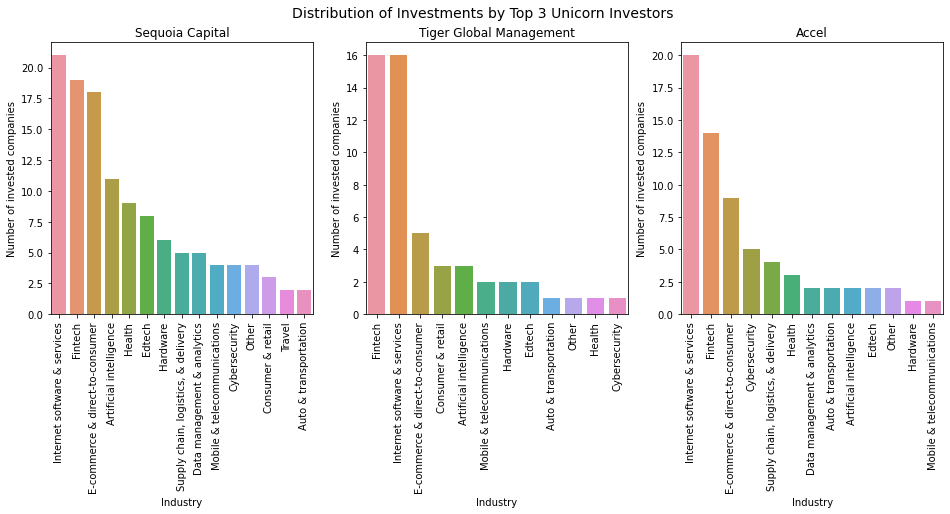

In [22]:
# Create 3 bar plots for the distribution of investments by industry for each top unicorn investors.

fig, axes = plt.subplots(1, 3, figsize = (16, 5))
idx = 0

for c in ["Sequoia Capital", "Tiger Global Management", "Accel"]:
    
    # Compute the number of companies invested in in each industry by c
    companies_sample = companies[companies[c] == 1]
    
    # Calculate the distribution of Industry
    companies_sample = companies_sample["Industry"].value_counts()

    # Create a bar plot
    sns.barplot(
        x=companies_sample.index, 
        y=companies_sample.values, 
        ax=axes[idx])

    # Set title
    axes[idx].set_title(c)

    # Set x-axis label
    axes[idx].set_xlabel("Industry")

    # Set y-axis label
    axes[idx].set_ylabel("Number of invested companies")

    # Rotate labels on the x-axis
    axes[idx].set_xticklabels(companies_sample.index, rotation=90);

    # Add 1 to idx so on the next loop it changes to the next plot
    idx +=1
    
plt.suptitle('Distribution of Investments by Top 3 Unicorn Investors', fontsize = 14);

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Generate three seperate figures or use the `subplot()` function to put all plots on one figure.
   
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

For each plot, filter the data to only inlcude companies invested in by that unicorn investor. 
    
Use `value_counts()` to calculate the distribution of `Industry` in the subsetted data.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

First, apply `value_counts()` to the `Industry` column in the subsetted data, Then, access the `x` values for the bar plot using `.index` from the `value_counts()` Series output and access the `y` values using `.values`.
    
</details>

**Question: What do you notice about the industries invested in by each top unicorn investor?**

Top 3 industries invested in are 'Fintech', 'Internet Software & services' and 'E-commerce & direct-to-consumer'.

### Continents 

Create a visualization that shows the continents of the unicorns invested in by the top three unicorn investors.

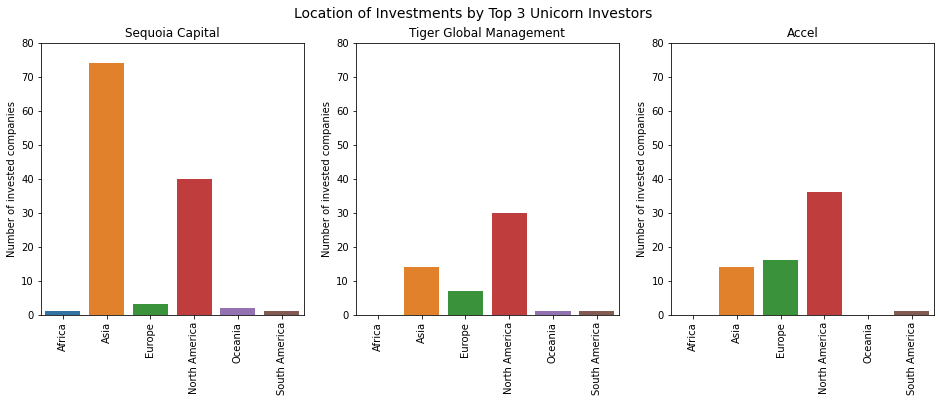

In [23]:
# Visualize the continents invested in by the top three unicorn investors.

fig, axes = plt.subplots(1, 3, figsize = (16,5))
idx = 0

# Loop through a list of the three top unicorn investors
for c in ["Sequoia Capital", "Tiger Global Management", "Accel"]:
    
    # Compute the number of companies invested in in each industry by c
    companies_sample = companies[companies[c] == 1]
    
    # Calculate the distribution of Continent
    companies_sample = companies_sample["Continent"].value_counts()
    
    # Add Oceania as index with value 0 if not present in companies_sample
    if "Oceania" not in companies_sample.index:
        companies_sample["Oceania"] = 0
        
    # Add Africa as index with value 0 if not present companies_sample
    if "Africa" not in companies_sample.index:
        companies_sample["Africa"] = 0
        
    # Sort the index so the x axis for all plot is in alphabetical order
    companies_sample = companies_sample.sort_index()
    
    # Create a bar plot
    sns.barplot(
        x=companies_sample.index, 
        y=companies_sample.values, 
        ax=axes[idx])

    # Set title
    axes[idx].set_title(c)

    # Set y range so all plots have same range
    axes[idx].set(ylim=(0, 80))

    # Set y-axis label
    axes[idx].set_ylabel("Number of invested companies")

    # Rotate labels on the x-axis
    axes[idx].set_xticklabels(companies_sample.index, rotation=90);

    # Add 1 to idx so on the next loop it changes ot the next plot
    idx +=1

plt.suptitle('Location of Investments by Top 3 Unicorn Investors', fontsize = 14);

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use steps from the previous exercise as a starting point.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use a similar approach to the previous problem, but select `Continent` on the x-axis instead of `Industry`.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

It is helpful (though unneccessary) to standardize the x labels and y range for all three plots for easy comparison.
    
</details>

**Question: What do you notice about the continents invested in by each top unicorn investor?**

In all 3, North America, Asia, and Europe are the top 3 countries invested in. In Sequoia Capital, the top country is Asia, while for the other two, it's North America.

## Step 4: Results and evaluation

Your client wants to know if there are particular investment strategies for the three large unicorn investors: Sequoia Capital, Tiger Global Management, and Accel. Therefore, consider how you would present your findings and whether the business will find that information insightful.

### Calculate the average `Years to Unicorn` 

In [24]:
# Compute the mean Years to Unicorn for unicorn companies invested in by Sequoia Capital.

print(companies[companies["Sequoia Capital"] == 1]["Years To Unicorn"].mean())

# Compute the mean Years to Unicorn for unicorn companies invested in by Tiger Global Management.

print(companies[companies["Tiger Global Management"] == 1]["Years To Unicorn"].mean())

# Compute the mean Years to Unicorn for unicorn companies invested in by Accel.

print(companies[companies["Accel"] == 1]["Years To Unicorn"].mean())

6.570247933884297
7.264150943396227
6.895522388059701


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Subset the data to only include companies invested in by that particular unicorn investor.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Once you've computed the mean `Years To Unicorn` for one investor, reuse that code to calculate the averages for the other investors. 
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Apply `.mean()` to the `Years To Unicorn` in the data subset for each investment company.
    
</details>

**Question: Of the three top unicorn investors, which has the shortest average `Years to Unicorn`?**

Sequoia Capital is the shortest, while Tiger Global Management is the longest.

### Find the three companies with the highest `Valuation` 

In [25]:
# Sort companies by Valuation in descending order.

companies = companies.sort_values(by = "Valuation", ascending=False)

# Calculate the 3 companies with the highest valuation invested in by Sequoia Capital.

print(companies[companies["Sequoia Capital"] == 1]["Company"].values[:3])

# Calculate the 3 companies with the highest valuation invested in by Tiger Global Management.

print(companies[companies["Tiger Global Management"] == 1]["Company"].values[:3])

# Calculate the 3 companies with the highest valuation invested in by Accel.

print(companies[companies["Accel"] == 1]["Company"].values[:3])


['Bytedance' 'SHEIN' 'Klarna']
['SHEIN' 'Checkout.com' 'JUUL Labs']
['Miro' 'goPuff' 'Celonis']


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Sort the full `companies` data by `Valuation`.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

When filtering `companies`, the filtered data will retain any sorting applied.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Subset the data to only include unicorns invested in by that particular investment company. Then, use `['Company'].values[:3]` to access the first three companies.
    
</details>

**Question: What are the three companies with the highest `Valuation` invested in by each of the top three unicorn investors?**

Sequoia Capital - Bytedance, SHEIN, Klarna. Tiger Global Management - SHEIN, Checkout.com, and JUUL Labs. Accel - Miro, goPuff, and Celonis.

**Question: Why might it be helpful to provide the business with examples of the unicorns invested in by the top three unicorn investors?**

It highlights what type of companies these top investment companies have stakes in.

### Determine if the three companies invest simultaneously

In [27]:
# Find companies invested in by two or more top unicorn investors.

# New column of top 3 investors
companies["Big 3 Investors"] = companies["Sequoia Capital"] + companies["Tiger Global Management"] + companies["Accel"]

# New dataframe with at least 2 companies or more invested in
top_companies = companies[companies["Big 3 Investors"] >= 2]

# List of the companies in top_companies
top_companies_list = companies[companies["Big 3 Investors"] >= 2]["Company"].values

# Display the results
print("Number of unicorns with two or more of the Big 3 Investors: ")
print(len(top_companies_list))

print("Companies")
print(top_companies_list)

Number of unicorns with two or more of the Big 3 Investors: 
18
Companies
['SHEIN' 'Getir' 'Razorpay' 'DJI Innovations' 'Ola Cabs' 'CRED'
 'ChargeBee Technologies' 'Ironclad' 'Groww' 'Infra.Market' 'Ethos'
 'Zetwerk' 'CoinSwitch Kuber' 'Veriff' 'Zenoti' 'Vedantu'
 'Five Star Business Finance' 'CaptivateIQ']


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Some variables that have already been created can help complete this task.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Create a new column in `companies` that counts the number of the top three unicorn investors that invested in it.
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

The following code creates a new column, called `Big 3 Investors`, that counts how many of `Sequoia Capital`, `Tiger Global Management`, and `Accel` invested in each unicorn company.
    
`companies['Big 3 Investors'] = companies['Sequoia Capital'] + companies['Tiger Global Management'] + companies['Accel']`
    
Filter for unicorns with multiple `Big 3 Investors` using `companies[companies['Big 3 Investors'] >= 2]`.
</details>

**Question: Do the top three investors invest in the same unicorn companies? If so, how often?**

Yes, SHIEN, Getir, and Razorpay.

## Conclusion

**What are the key takeaways from this lab?**

Practice of input validation throughout the activity to make sure the data is as high quality as possible. It also helps with encoding the data and 


**What summary would you provide to stakeholders? Consider industries represented, locations, speed to unicorn status, simultaneous investments, and overall value.**

[Write your response here. Double-click (or enter) to edit.]


**Reference**

[Bhat, M.A. *Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies)

